## Baggage Damage classification using Image Augmentation and Transfer Learning for Convolutional Neural Networks

Get the current working directory

In [1]:
import os

PATH = os.getcwd()

In [177]:
PATH

'C:\\Insofe\\Labs\\DayLab24\\CNN-Transfer Learning'

Define the data path

In [2]:
# Define data path
data_path = PATH + '/BagImages'
data_dir_list = os.listdir(data_path)

In [3]:
print(data_dir_list)

['Damaged', 'NotDamaged']


In [126]:
#!pip install opencv-python

Required variables declaration and initialization

In [4]:
img_rows=224
img_cols=224
num_channel=3
num_epoch=2

img_data_list=[]
classes_names_list=[]

In [5]:
data_dir_list

['Damaged', 'NotDamaged']

Read the images and store them in the list

In [6]:
import cv2

for dataset in data_dir_list:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list = os.listdir(data_path +'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize = cv2.resize(input_img,(img_rows, img_cols))
        img_data_list.append(input_img_resize)

Loading images from Damaged folder

Loading images from NotDamaged folder



In [7]:
num_classes = len(classes_names_list)

print(num_classes)

2


In [8]:
img_data_list

[array([[[102, 116, 120],
         [106, 121, 124],
         [ 96, 111, 114],
         ...,
         [ 28,  26,  32],
         [ 26,  24,  30],
         [ 23,  21,  27]],
 
        [[ 99, 114, 117],
         [ 98, 113, 116],
         [102, 117, 120],
         ...,
         [ 23,  22,  28],
         [ 26,  24,  30],
         [ 27,  24,  30]],
 
        [[100, 116, 118],
         [ 96, 111, 114],
         [102, 117, 120],
         ...,
         [ 26,  24,  30],
         [ 26,  24,  31],
         [ 25,  23,  29]],
 
        ...,
 
        [[173, 179, 184],
         [184, 190, 195],
         [154, 160, 165],
         ...,
         [163, 170, 167],
         [157, 164, 161],
         [163, 170, 167]],
 
        [[180, 186, 190],
         [178, 184, 189],
         [148, 154, 159],
         ...,
         [164, 171, 168],
         [154, 161, 158],
         [157, 164, 161]],
 
        [[158, 165, 169],
         [169, 175, 180],
         [153, 159, 164],
         ...,
         [174, 181, 178],
  

###### Image preprocessiong 

In [9]:
import numpy as np
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [10]:
#print (img_data)
print(img_data_list)

[array([[[102, 116, 120],
        [106, 121, 124],
        [ 96, 111, 114],
        ...,
        [ 28,  26,  32],
        [ 26,  24,  30],
        [ 23,  21,  27]],

       [[ 99, 114, 117],
        [ 98, 113, 116],
        [102, 117, 120],
        ...,
        [ 23,  22,  28],
        [ 26,  24,  30],
        [ 27,  24,  30]],

       [[100, 116, 118],
        [ 96, 111, 114],
        [102, 117, 120],
        ...,
        [ 26,  24,  30],
        [ 26,  24,  31],
        [ 25,  23,  29]],

       ...,

       [[173, 179, 184],
        [184, 190, 195],
        [154, 160, 165],
        ...,
        [163, 170, 167],
        [157, 164, 161],
        [163, 170, 167]],

       [[180, 186, 190],
        [178, 184, 189],
        [148, 154, 159],
        ...,
        [164, 171, 168],
        [154, 161, 158],
        [157, 164, 161]],

       [[158, 165, 169],
        [169, 175, 180],
        [153, 159, 164],
        ...,
        [174, 181, 178],
        [158, 165, 162],
        [146, 153, 150]

In [11]:
print (img_data.shape)

img_data = img_data.reshape(img_data.shape[0], img_data.shape[1], img_data.shape[2], num_channel)

(22, 224, 224, 3)


In [12]:
print(img_data.shape[0])

22


In [13]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape
print(img_data.shape[0])
#print(img_data)
print(num_of_samples)
print(input_shape )

22
22
(224, 224, 3)


In [14]:
classes = np.ones((num_of_samples,), dtype='int64')

In [15]:
classes
#num_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [16]:
classes = np.ones((num_of_samples,), dtype='int64')
classes[0:11]=0
classes[11:]=1

In [17]:
from keras.utils import to_categorical

# convert class labels to on-hot encoding
classes = to_categorical(classes, num_classes)

C:\Users\Dipta\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Dipta\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dipta\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])

In [194]:
classes

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Shuffle the dataset

In [18]:
from sklearn.utils import shuffle

x, y = shuffle(img_data, classes, random_state=2)

In [160]:
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

Split the dataset

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


Defining the model

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Convolution2D, MaxPooling2D

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

Compile the model

Viewing model_configuration

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
__________

In [68]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 224, 224, 3),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_4',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'BatchNormalization',
  'config': {'axis': -1,
   'beta_constraint': None,
   'beta_initializer': {'class_name': 'Zeros', 'config': {}},
   'beta_regularizer': None,
   'center': True,
   'epsilon': 0.001,
   'gamma_constraint': None,
   'gamma_initializer'

In [275]:
model.layers[0].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'batch_input_shape': (None, 224, 224, 3),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 32,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'conv2d_29',
 'padding': 'valid',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [276]:
model.layers[0].input_shape

(None, 224, 224, 3)

In [153]:
model.layers[0].output_shape

(None, 222, 222, 32)

In [154]:
model.layers[0].get_weights()

[array([[[[ 1.30435124e-01, -4.38006520e-02, -2.40350440e-02,
           -3.91400382e-02, -7.30012059e-02, -5.94180673e-02,
            4.74037379e-02, -6.71208426e-02,  7.36834258e-02,
           -5.34619540e-02, -1.02749728e-01,  3.91202867e-02,
           -3.69192213e-02,  1.19667485e-01,  3.73947620e-02,
           -2.49161720e-02,  9.48834270e-02, -3.84893119e-02,
            1.19105428e-02, -7.81046301e-02,  9.24228281e-02,
           -1.28257498e-01, -1.10868290e-01,  1.97834074e-02,
           -7.87929296e-02,  4.53546494e-02, -1.04695693e-01,
            8.49224478e-02,  4.35203761e-02,  5.38113713e-02,
           -3.16721722e-02, -4.20814082e-02],
          [ 1.22538820e-01, -8.48435163e-02,  5.89630902e-02,
            1.07305601e-01, -1.20656669e-01,  2.02126801e-02,
            8.00280869e-02, -8.61182511e-02, -6.93284944e-02,
           -6.13967404e-02, -1.75696984e-02, -8.87039155e-02,
            3.33684683e-03, -5.97114861e-02, -5.12533784e-02,
            4.06264514e-

In [155]:
model.layers[0].trainable

True

#### Training/fit the model 

In [26]:
hist = model.fit(X_train, y_train, batch_size=15, epochs = 10, verbose=2, validation_data=(X_test, y_test))

Train on 17 samples, validate on 5 samples
Epoch 1/10
 - 7s - loss: 0.0013 - acc: 1.0000 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 2/10
 - 7s - loss: 0.6287 - acc: 0.9412 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 3/10
 - 7s - loss: 2.5664 - acc: 0.7647 - val_loss: 6.0897e-05 - val_acc: 1.0000
Epoch 4/10
 - 7s - loss: 0.7356 - acc: 0.8824 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 5/10
 - 7s - loss: 0.4734 - acc: 0.9412 - val_loss: 1.7394e-04 - val_acc: 1.0000
Epoch 6/10
 - 7s - loss: 2.9431e-04 - acc: 1.0000 - val_loss: 3.8519e-04 - val_acc: 1.0000
Epoch 7/10
 - 7s - loss: 0.9625 - acc: 0.9412 - val_loss: 1.1945 - val_acc: 0.8000
Epoch 8/10
 - 7s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 9/10
 - 7s - loss: 0.0479 - acc: 0.9412 - val_loss: 0.0100 - val_acc: 1.0000
Epoch 10/10
 - 7s - loss: 0.4016 - acc: 0.9412 - val_loss: 0.0085 - val_acc: 1.0000


#### Training with callbacks

Callback:
    
    A callback is a set of functions to be applied at given stages of the training procedure. 
    
    Callbacks is used to get a view on internal states and statistics of the model during training. 
    
    Pass a list of callbacks to the .fit() method of the Sequential or Model classes. 
        
        The relevant methods of the callbacks will then be called at each stage of the training. 

In [31]:
from keras import callbacks

##### CSVLogger:
    
    Callback that streams epoch results to a csv file.

In [32]:
filename='model_train_new.csv'

csv_log = callbacks.CSVLogger(filename, separator=',', append=False)

##### EarlyStopping:

    Stop training when a monitored quantity has stopped improving.

In [33]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

##### ModelCheckpoint:

    Save the model after every epoch.

In [34]:
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


##### Create the callbacks list

In [35]:
callbacks_list = [csv_log, early_stopping, checkpoint]

##### Fit the model with the created list of callbacks

In [36]:
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Train on 17 samples, validate on 5 samples
Epoch 1/2
17/17 [==============================] - 8s 459ms/step - loss: 0.0438 - acc: 0.9412 - val_loss: 0.7917 - val_acc: 0.8000

Epoch 00001: val_loss improved from inf to 0.79174, saving model to Best-weights-my_model-001-0.0438-0.9412.hdf5
Epoch 2/2
17/17 [==============================] - 8s 448ms/step - loss: 0.0402 - acc: 1.0000 - val_loss: 0.6618 - val_acc: 0.8000

Epoch 00002: val_loss improved from 0.79174 to 0.66180, saving model to Best-weights-my_model-002-0.0402-1.0000.hdf5


##### Evaluating the model

In [27]:
score = model.evaluate(X_test, y_test, batch_size=16)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

5/5 [==============================] - 1s 107ms/step
Test Loss: 0.008523961529135704
Test Accuracy: 1.0


In [28]:
test_image = X_test[0:1]
print (test_image.shape)

(1, 224, 224, 3)


In [29]:
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

[[0.9927255  0.00727444]]
[0]
[[1. 0.]]


In [30]:
X_test

array([[[[0.8156863 , 0.80784315, 0.8039216 ],
         [0.8117647 , 0.8039216 , 0.8       ],
         [0.8039216 , 0.79607844, 0.7921569 ],
         ...,
         [0.8117647 , 0.8039216 , 0.8       ],
         [0.8235294 , 0.8156863 , 0.8117647 ],
         [0.827451  , 0.81960785, 0.8156863 ]],

        [[0.827451  , 0.81960785, 0.8156863 ],
         [0.8117647 , 0.8039216 , 0.8       ],
         [0.8       , 0.7921569 , 0.7882353 ],
         ...,
         [0.8392157 , 0.83137256, 0.827451  ],
         [0.83137256, 0.8235294 , 0.81960785],
         [0.8156863 , 0.80784315, 0.80784315]],

        [[0.8117647 , 0.8039216 , 0.8       ],
         [0.81960785, 0.8117647 , 0.80784315],
         [0.7921569 , 0.78431374, 0.78039217],
         ...,
         [0.81960785, 0.8117647 , 0.80784315],
         [0.8392157 , 0.8352941 , 0.827451  ],
         [0.8352941 , 0.827451  , 0.8235294 ]],

        ...,

        [[0.59607846, 0.6       , 0.6156863 ],
         [0.6313726 , 0.63529414, 0.6509804 ]

##### Printing the confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
print(Y_pred)

[[9.9272549e-01 7.2744382e-03]
 [3.1162770e-02 9.6883720e-01]
 [9.9876750e-01 1.2325764e-03]
 [9.9999809e-01 1.8996960e-06]
 [2.4218801e-03 9.9757808e-01]]


In [32]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[0 1 0 0 1]


In [33]:
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[3 0]
 [0 2]]


###### Saving and loading model and weights

In [35]:
from keras.models import model_from_json, load_model

In [36]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")

In [37]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")

In [38]:
model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

###### Transfer Learning  learning  predefined wieghts from same net architecture of Imagenet

![](img/vggnet_architecture.png)

In [60]:
# Training the feature extraction also
model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [61]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='sigmoid', name='output')(x)

custom_vgg_model2 = Model(image_input, out)

In [62]:
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [63]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

In [64]:
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [65]:
custom_vgg_model2.compile(loss='binary_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [66]:
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=8, verbose=1, validation_data=(X_test, y_test))

Train on 17 samples, validate on 5 samples
Epoch 1/8
17/17 [==============================] - 9s 524ms/step - loss: 0.7179 - acc: 0.5000 - val_loss: 0.8536 - val_acc: 0.6000
Epoch 2/8
17/17 [==============================] - 7s 394ms/step - loss: 0.6031 - acc: 0.5882 - val_loss: 0.7244 - val_acc: 0.7000
Epoch 3/8
17/17 [==============================] - 7s 406ms/step - loss: 0.2132 - acc: 0.8824 - val_loss: 1.3698 - val_acc: 0.6000
Epoch 4/8
17/17 [==============================] - 7s 407ms/step - loss: 1.5086 - acc: 0.4706 - val_loss: 5.0192 - val_acc: 0.4000
Epoch 5/8
17/17 [==============================] - 7s 412ms/step - loss: 2.7329 - acc: 0.5294 - val_loss: 0.0630 - val_acc: 1.0000
Epoch 6/8
17/17 [==============================] - 7s 412ms/step - loss: 0.0523 - acc: 1.0000 - val_loss: 0.0298 - val_acc: 1.0000
Epoch 7/8
17/17 [==============================] - 7s 414ms/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0313 - val_acc: 1.0000
Epoch 8/8
17/17 [=======================

In [68]:
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

5/5 [==============================] - 1s 273ms/step
[INFO] loss=0.0333, accuracy: 100.0000%


In [69]:
# serialize model to JSON
custom_vgg_model2_json = custom_vgg_model2.to_json()
with open("custom_vgg_model2.json", "w") as json_file:
    json_file.write(custom_vgg_model2_json)

# serialize weights to HDF5
custom_vgg_model2.save_weights("custom_vgg_model2.h5")

In [70]:
# load json and create model
custom_vgg_model2_json_file = open('custom_vgg_model2.json', 'r')
custom_vgg_model2_loaded_model_json = custom_vgg_model2_json_file.read()
custom_vgg_model2_json_file.close()
custom_vgg_model2_loaded_model = model_from_json(custom_vgg_model2_loaded_model_json)

# load weights into new model
custom_vgg_model2_loaded_model.load_weights("custom_vgg_model2.h5")

In [71]:
custom_vgg_model2.save('custom_vgg_model2.hdf5')
custom_vgg_model2_loaded_model=load_model('custom_vgg_model2.hdf5')

In [587]:
import urllib

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [354]:
!pip install keras.preprocessing.image

ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.image


In [40]:
import matplotlib.pyplot as plt

In [42]:
def bag_damage(name,model):
    image_path = PATH + '/TestImages/'+name
    if os.path.exists(image_path):
        print('path exists')
    else:
        print('path not exists')
    img_data_list1=[]
    img_data1={}
    print(image_path)
    img1 = cv2.imread(image_path)
    input_img_resize1 = cv2.resize(img1,(img_rows, img_cols))
    img_data_list1.append(input_img_resize1)
    img_data1 = np.array(img_data_list1)
    img_data1 = img_data1.astype('float32')
    img_data1 /= 255
    img_data1 = img_data1.reshape(img_data1.shape[0], img_data1.shape[1], img_data1.shape[2], num_channel)
    
    #x = img_data.reshape(img_data.shape[0], img_data.shape[1], img_data.shape[2], num_channel)
    
    #x = img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
    #x = x.reshape((1,) + x.shape)/255 # this is a Numpy array with shape (1, 3, 256, 256)
    pred = model.predict(img_data1)
    print(model.predict(img_data1))
    print(model.predict_classes(img_data1))
    plt.imshow(img1)
    plt.show()
    print ("Validating that damage exists...")
    print (pred)
    print (pred[0][0])
    if model.predict_classes(img_data1) == 0:
        print ("Validation complete - baggage is damaged proceed to location and severity determination")
    else:
        print ("Are you sure that your bag is damaged?  Seems like baggage is not dmaged Please submit another picture of the damage.")
        print ("Hint: Try zooming in/out, using a different angle or different lighting")

path exists
C:\Insofe\Labs\DayLab24\CNN-Transfer Learning/TestImages/badImage2.jpg
[[9.9999809e-01 1.8997014e-06]]
[0]


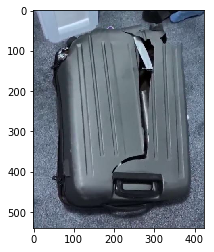

Validating that damage exists...
[[9.9999809e-01 1.8997014e-06]]
0.9999981
Validation complete - baggage is damaged proceed to location and severity determination


In [73]:
bag_damage('badImage2.jpg',loaded_model)

path exists
C:\Insofe\Labs\DayLab24\CNN-Transfer Learning/TestImages/dam4.jpg
[[9.999902e-01 9.782792e-06]]
[0]


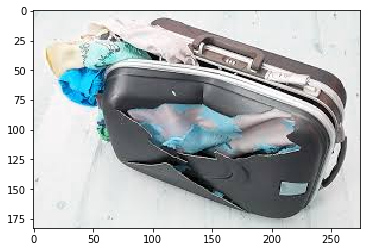

Validating that damage exists...
[[9.999902e-01 9.782792e-06]]
0.9999902
Validation complete - baggage is damaged proceed to location and severity determination


In [76]:
bag_damage('dam4.jpg',loaded_model)

path exists
C:\Insofe\Labs\DayLab24\CNN-Transfer Learning/TestImages/damaged-luggage.jpg
[[9.9999738e-01 2.5726163e-06]]
[0]


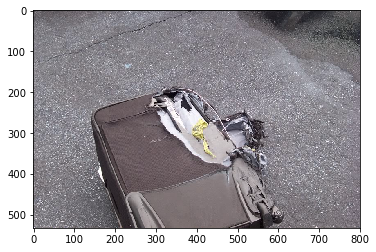

Validating that damage exists...
[[9.9999738e-01 2.5726163e-06]]
0.9999974
Validation complete - baggage is damaged proceed to location and severity determination


In [45]:
bag_damage('damaged-luggage.jpg',loaded_model)

path exists
C:\Insofe\Labs\DayLab24\CNN-Transfer Learning/TestImages/good11.jpg
[[0.00242189 0.9975781 ]]
[1]


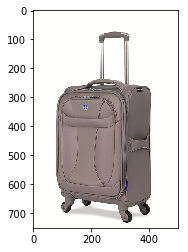

Validating that damage exists...
[[0.00242189 0.9975781 ]]
0.0024218915
Are you sure that your bag is damaged?  Seems like baggage is not dmaged Please submit another picture of the damage.
Hint: Try zooming in/out, using a different angle or different lighting


In [46]:
bag_damage('good11.jpg',loaded_model)

path exists
C:\Insofe\Labs\DayLab24\CNN-Transfer Learning/TestImages/good5.jpg
[[6.068525e-05 9.999393e-01]]
[1]


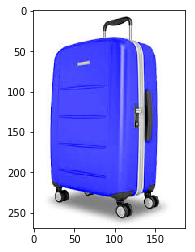

Validating that damage exists...
[[6.068525e-05 9.999393e-01]]
6.068525e-05
Are you sure that your bag is damaged?  Seems like baggage is not dmaged Please submit another picture of the damage.
Hint: Try zooming in/out, using a different angle or different lighting


In [47]:
bag_damage('good5.jpg',loaded_model)

path exists
C:\Insofe\Labs\DayLab24\CNN-Transfer Learning/TestImages/good11.jpg
[[0.00242189 0.9975781 ]]
[1]


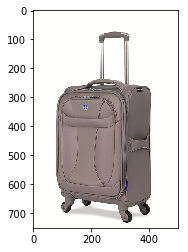

Validating that damage exists...
[[0.00242189 0.9975781 ]]
0.0024218915
Are you sure that your bag is damaged?  Seems like baggage is not dmaged Please submit another picture of the damage.
Hint: Try zooming in/out, using a different angle or different lighting


In [48]:
bag_damage('good11.jpg',loaded_model)

In [366]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

Ref:
    
    https://github.com/anujshah1003/Transfer-Learning-in-keras---custom-data